In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
%matplotlib inline

In [3]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Checking shape of the dataset
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [5]:
# List of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Text(0.5, 1.0, 'Ankle boot')

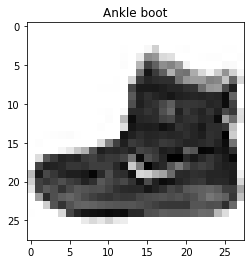

In [7]:
plt.imshow(x_train[0], cmap='Greys')
plt.title(class_names[y_train[0]])

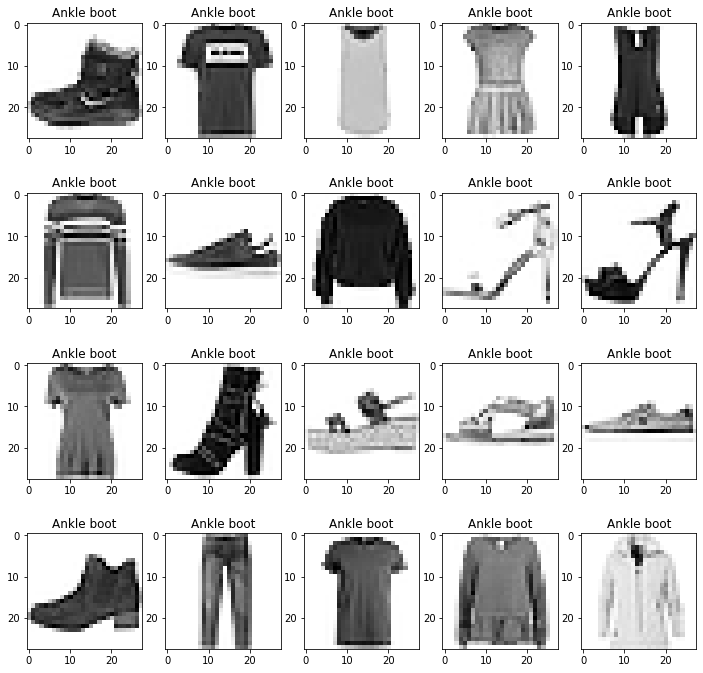

In [10]:
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='Greys')
    plt.title(class_names[y_train[0]])

In [11]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Creating ANN model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Initializing Early stopping callback
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [19]:
# Fitting the model
model_history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=10,
    callbacks=callback,
    validation_data=(x_test, y_test))

Epoch 1/100
6000/6000 [==============================] - 16s 2ms/step - loss: 0.5005 - accuracy: 0.8217 - val_loss: 0.4340 - val_accuracy: 0.8414
Epoch 2/100
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3891 - accuracy: 0.8580 - val_loss: 0.4070 - val_accuracy: 0.8548
Epoch 3/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3555 - accuracy: 0.8684 - val_loss: 0.4271 - val_accuracy: 0.8470
Epoch 4/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3347 - accuracy: 0.8772 - val_loss: 0.3714 - val_accuracy: 0.8664
Epoch 5/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3224 - accuracy: 0.8801 - val_loss: 0.3790 - val_accuracy: 0.8663
Epoch 6/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3086 - accuracy: 0.8847 - val_loss: 0.3664 - val_accuracy: 0.8689
Epoch 7/100
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2999 - accuracy: 0.8883 - val_loss: 0.3758 -

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

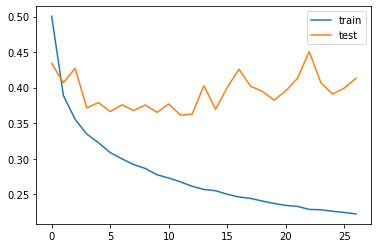

In [21]:
# Plotting loss curve
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()

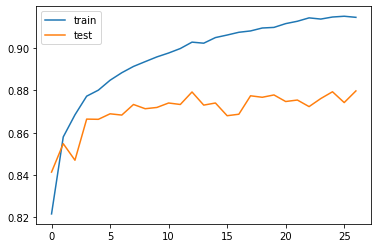

In [22]:
# Plotting accuracy curve
plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.legend()

In [23]:
y_pred = model.predict(x_test)
ind = np.argmax(y_pred[0].round(2))
ind

9

In [24]:
# Model evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.8797


[0.4132867753505707, 0.8797000050544739]

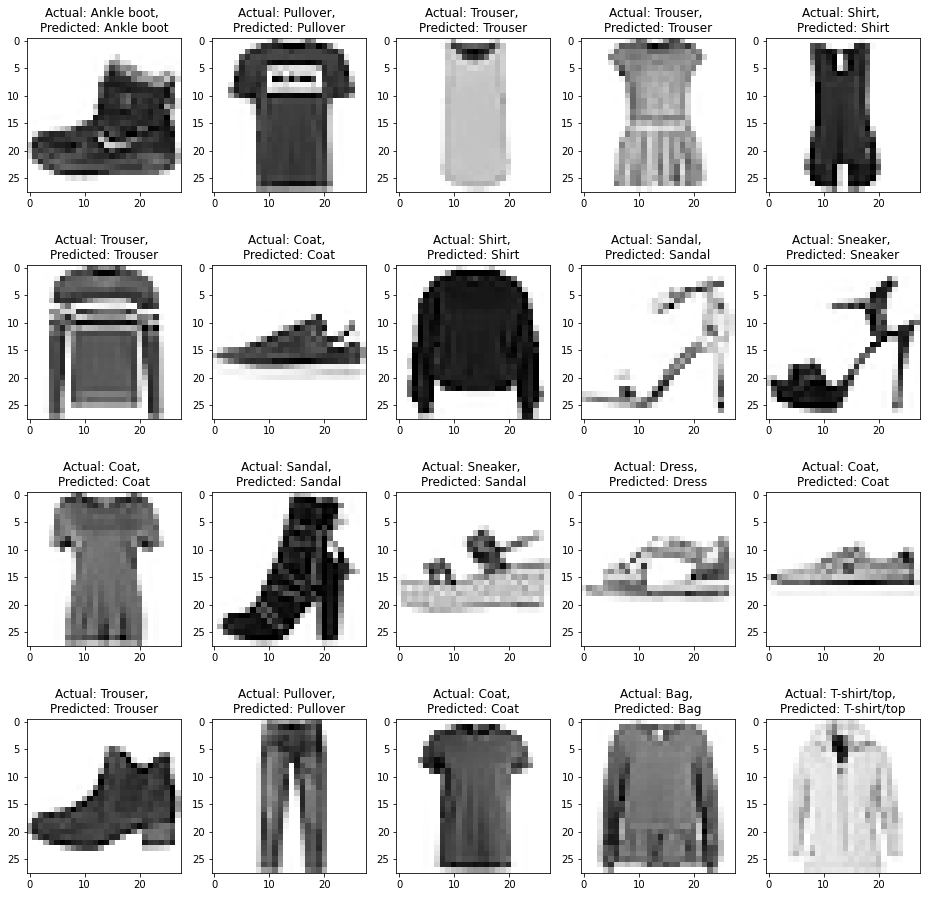

In [25]:
plt.figure(figsize=(16, 16))

for i in range(20):
  plt.subplot(4, 5, i+1)
  plt.imshow(x_train[i], cmap='Greys')
  plt.title(f'Actual: {class_names[y_test[i]]}, \nPredicted: {class_names[np.argmax(y_pred[i].round(2))]}')

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

<AxesSubplot:>

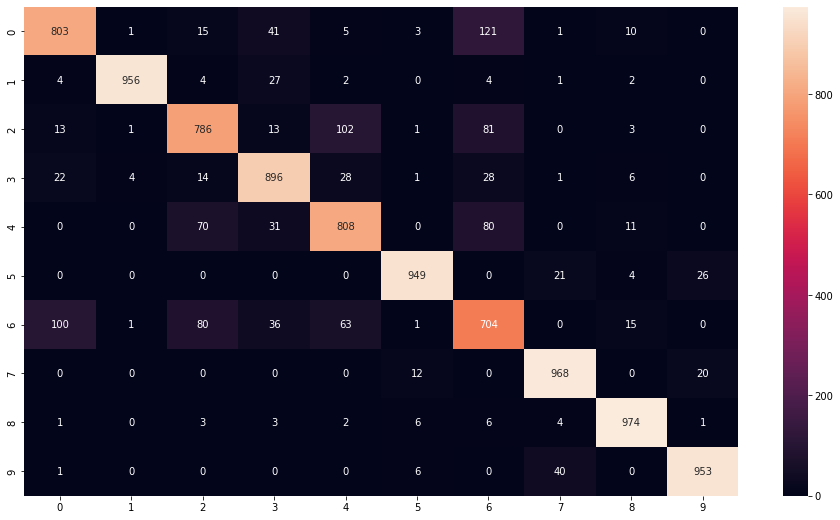

In [27]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')

In [28]:
# Save the model
model.save('fashion-mnist-model.h5')